In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

In [3]:
data = pd.read_csv('Data Scientist Clean.csv')
data.head()

,Company,Company Score,Job Title,Date,Salary,Skills,Estimation Type,Remote,City,Country
0,Razorpoint,3.4,Junior Data Scientist,3.0,35000.0,"Data mining, Big data, R, Data analysis skills...",Employer est.,Onsite,Manchester,England
1,tower Hamlets,3.7,Assistant Data Scientist (Graduate) | R-2375,5.0,64480.0,"R, SQL, JavaScript, Python",Employer est.,Onsite,London,England
2,TW,4.0,Data Scientist,31.0,57500.0,"SQL, Maths, Data science, Python",Employer est.,Onsite,Nottingham,England
3,NatWest Group,4.6,Data Scientist,2.0,47500.0,"Software deployment, Data analysis skills, Sta...",Glasdoor est.,Onsite,Edinburgh,Scotland
4,iwoca,3.9,Data Scientist - Ops,7.0,75000.0,"MATLAB, R, Maths, C, Machine learning",Employer est.,Onsite,London,England


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635 entries, 0 to 634
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          635 non-null    object 
 1   Company Score    635 non-null    float64
 2   Job Title        635 non-null    object 
 3   Date             635 non-null    float64
 4   Salary           635 non-null    float64
 5   Skills           635 non-null    object 
 6   Estimation Type  635 non-null    object 
 7   Remote           635 non-null    object 
 8   City             581 non-null    object 
 9   Country          581 non-null    object 
dtypes: float64(3), object(7)
memory usage: 49.7+ KB


In [7]:
data.isna().sum()

Company             0
Company Score       0
Job Title           0
Date                0
Salary              0
Skills              0
Estimation Type     0
Remote              0
City               54
Country            54
dtype: int64

In [53]:
data.describe()

,Company Score,Date,Salary
count,635.000000,635.000000,635.000000
mean,3.850866,27.601575,65487.181102
std,0.465001,13.318958,22964.437740
min,1.700000,2.000000,24500.000000
25%,3.600000,14.000000,49250.000000
50%,3.900000,32.000000,63000.000000
75%,4.100000,39.000000,76250.000000
max,5.000000,44.000000,200000.000000


In [101]:
# Split the skills into individual skills and explode into new rows
skills_df = data.assign(Skills=data['Skills'].str.split(',')).explode('Skills')

# Strip any leading or trailing whitespace from the skills
skills_df['Skills'] = skills_df['Skills'].str.strip()

# Get the frequency of each skill
skill_counts = skills_df['Skills'].value_counts()

skill_counts.head(15)

Skills
Machine learning         260
SQL                      167
TensorFlow               135
R                        130
Azure                    107
Data science              90
Python                    85
Communication skills      75
AWS                       72
Google Cloud Platform     69
Power BI                  68
Spark                     65
Data analysis skills      61
Tableau                   55
Git                       55
Name: count, dtype: int64

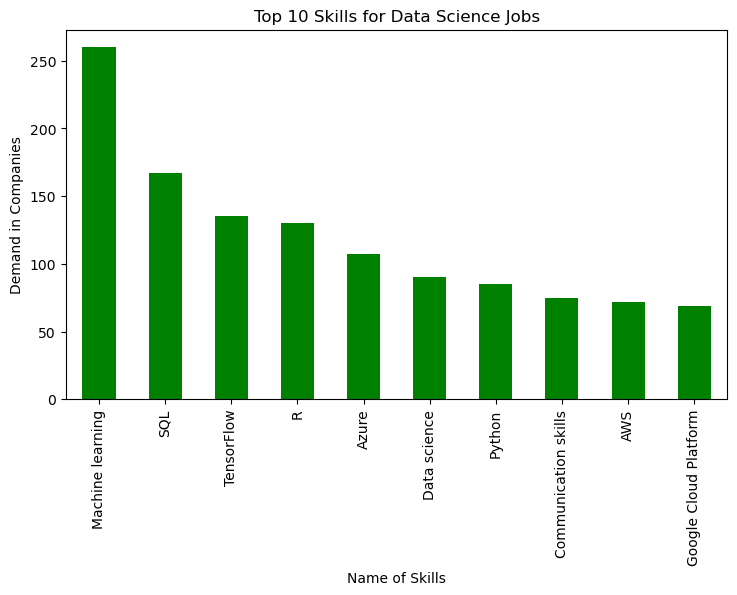

In [131]:
skill_counts.head(10).plot(kind='bar', color = 'green')
plt.title('Top 10 Skills for Data Science Jobs')
plt.xlabel('Name of Skills')
plt.ylabel('Demand in Companies')
fig = plt.gcf()
fig.set_size_inches(2560/300, 1440/300)
plt.savefig('Top 10 Skills for Data Science Jobs', bbox_inches='tight', dpi=600)
plt.show()

In [69]:
# Group the data by company and calculate the max salary
company_salaries = data.groupby('Company')['Salary'].max().reset_index()

# Sort the companies by max salary in descending order
company_salaries = company_salaries.sort_values('Salary', ascending=False)

# Get the top 5 companies
top_companies = company_salaries.head(5)

top_companies

,Company,Salary
89,Creative Artists Agency (CAA),200000.0
338,Starling Bank,150000.0
142,Fionics,144000.0
234,Luminance Technologies,143000.0
165,HEOR,140000.0


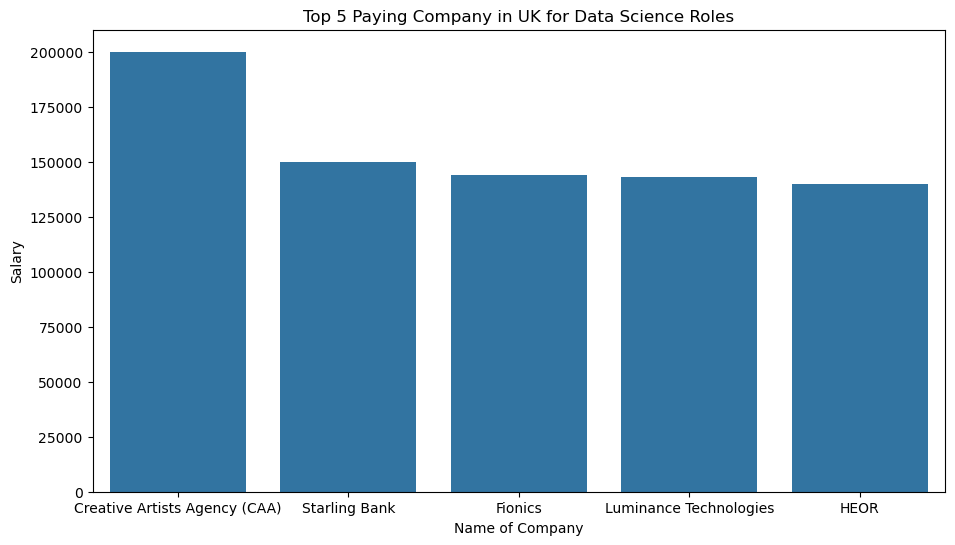

In [79]:
plt.figure(figsize=(11,6))
sns.barplot(x='Company', y='Salary', data = top_companies)
plt.title('Top 5 Paying Company in UK for Data Science Roles')
plt.xlabel('Name of Company')
plt.ylabel('Salary')
plt.show()

In [97]:
company_score = data.groupby('Company')['Company Score'].max().reset_index()

company_score = company_score.sort_values('Company Score', ascending=False)

top_score = company_score.head(20)

top_score

,Company,Company Score
30,BAE Systems,5.0
403,causaLens,5.0
324,Scottish Power,5.0
166,HMGCC,5.0
359,Tripadvisor,5.0
199,InstaDeep,5.0
45,Boon Global,5.0
206,JPMorgan Chase & Co,5.0
39,Blis,5.0
37,Binance,5.0


In [115]:
# Split the job titles into individual job titles and explode into new rows
job_title_df = data.assign(Job_Title=data['Job Title'].str.split(',')).explode('Job_Title')

# Strip any leading or trailing whitespace from the job titles
job_title_df['Job_Title'] = job_title_df['Job_Title'].str.strip()

# Get the frequency of each job title
Job_title_counts = job_title_df['Job_Title'].value_counts()
Job_title_counts.head(20)

Job_Title
Data Scientist                      76
Senior Data Scientist               42
Machine Learning Engineer           22
Lead Data Scientist                 10
NLP                                  7
Applied Scientist                    5
Data Science Manager                 5
Director of Data Science             5
Principal Data Scientist             5
Senior Machine Learning Engineer     5
Machine Learning                     4
Vice President                       4
Senior Applied Scientist             4
Data Analyst                         4
Applied Research Scientist           4
Product Analytics                    4
Data & Analytics                     4
Belfast                              4
Data Analytics Manager               3
Head of Data & Analytics             3
Name: count, dtype: int64

In [117]:
data.head()

,Company,Company Score,Job Title,Date,Salary,Skills,Estimation Type,Remote,City,Country
0,Razorpoint,3.4,Junior Data Scientist,3.0,35000.0,"Data mining, Big data, R, Data analysis skills...",Employer est.,Onsite,Manchester,England
1,tower Hamlets,3.7,Assistant Data Scientist (Graduate) | R-2375,5.0,64480.0,"R, SQL, JavaScript, Python",Employer est.,Onsite,London,England
2,TW,4.0,Data Scientist,31.0,57500.0,"SQL, Maths, Data science, Python",Employer est.,Onsite,Nottingham,England
3,NatWest Group,4.6,Data Scientist,2.0,47500.0,"Software deployment, Data analysis skills, Sta...",Glasdoor est.,Onsite,Edinburgh,Scotland
4,iwoca,3.9,Data Scientist - Ops,7.0,75000.0,"MATLAB, R, Maths, C, Machine learning",Employer est.,Onsite,London,England


In [121]:
data_analyst_jobs = data[data['Job Title'] == 'Data Analyst']
data_analyst_jobs

,Company,Company Score,Job Title,Date,Salary,Skills,Estimation Type,Remote,City,Country
43,Windranger Labs,4.8,Data Analyst,10.0,70000.0,"R, Git, SQL, Machine learning, Python",Employer est.,Remote,NaN,NaN
67,Creditsafe,3.2,Data Analyst,4.0,67000.0,"Spark, R, Data analysis skills, NoSQL, Git",Glasdoor est.,Onsite,Cardiff,Wales
129,Bannatyne,3.9,Data Analyst,11.0,50000.0,"Power BI, Azure, Big data, Spark, Tableau",Glasdoor est.,Onsite,Durham,England
132,Global 4 Communications Limited,3.8,Data Analyst,44.0,81500.0,"R, SQL, Statistical analysis, Maths, Machine l...",Employer est.,Onsite,Horsham,England
